<a href="https://colab.research.google.com/github/dhadkan99/Github/blob/main/coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/cource work/Urban_Traffic_Data.csv')
data_df.head()
print(data_df.isnull().sum())
print(data_df.describe())

City                                 0
Year                                 0
Average_Daily_Traffic_Counts         0
Peak_Hourly_Traffic_Volume           0
Percentage_of_Commercial_Vehicles    0
Number_of_Road_Accidents             0
Average_Traffic_Speed_kmh            0
Air_Quality_Index                    0
Population_Million                   0
dtype: int64
             Year  Average_Daily_Traffic_Counts  Peak_Hourly_Traffic_Volume  \
count   300.00000                    300.000000                  300.000000   
mean   2019.50000                  29655.313333                 2972.856667   
std       2.87708                  11360.483090                 1159.243400   
min    2015.00000                  10029.000000                 1005.000000   
25%    2017.00000                  20790.250000                 1964.250000   
50%    2019.50000                  29401.000000                 3052.000000   
75%    2022.00000                  39997.750000                 3911.750000   
max 

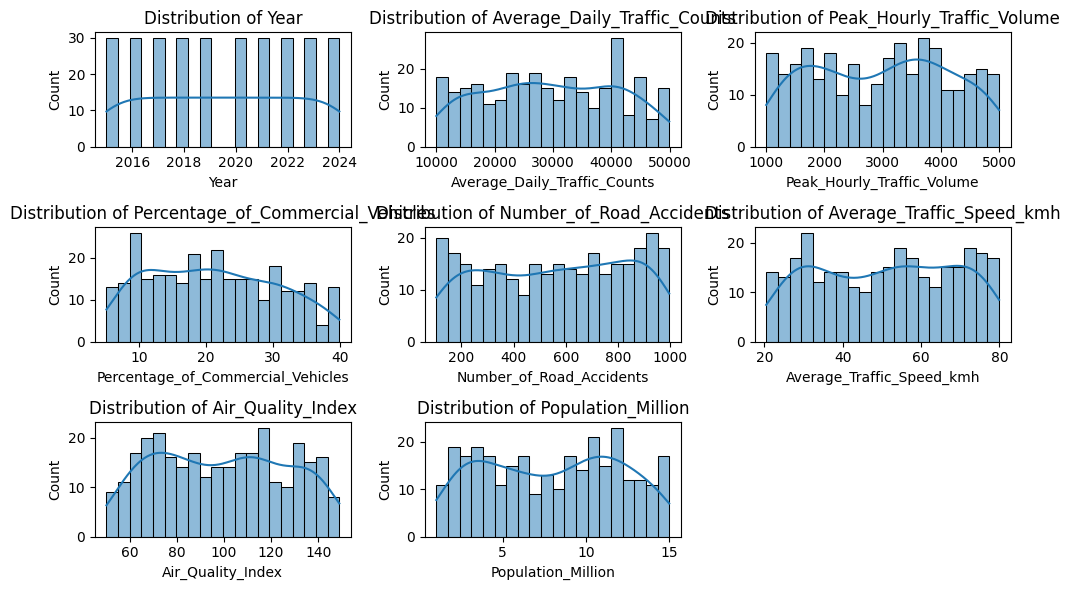

In [ ]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_df.columns[1:]):  # Exclude 'City'
    plt.subplot(3, 3, i+1)
    sns.histplot(data_df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

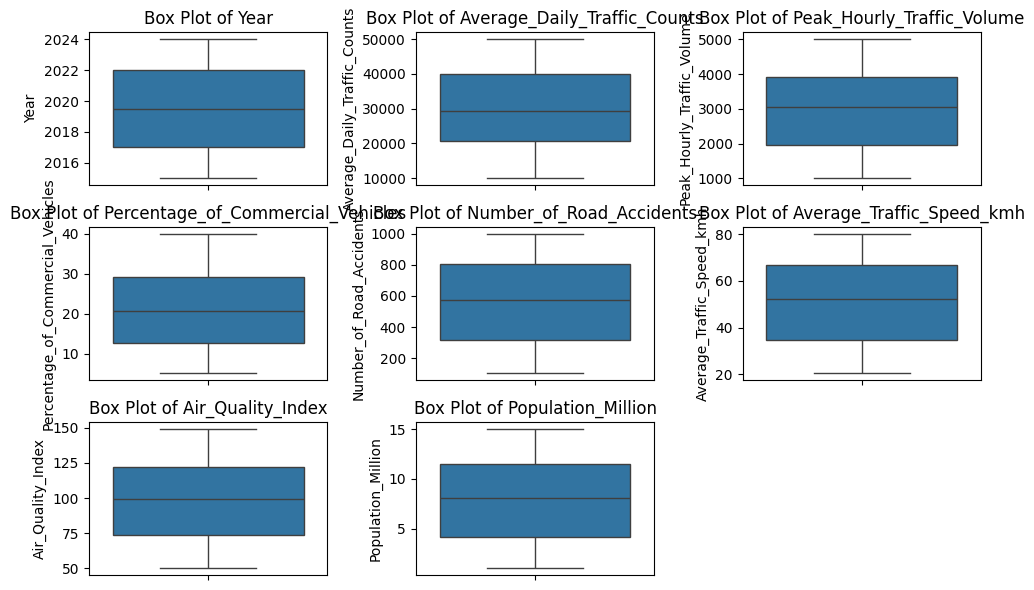

In [ ]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(data_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

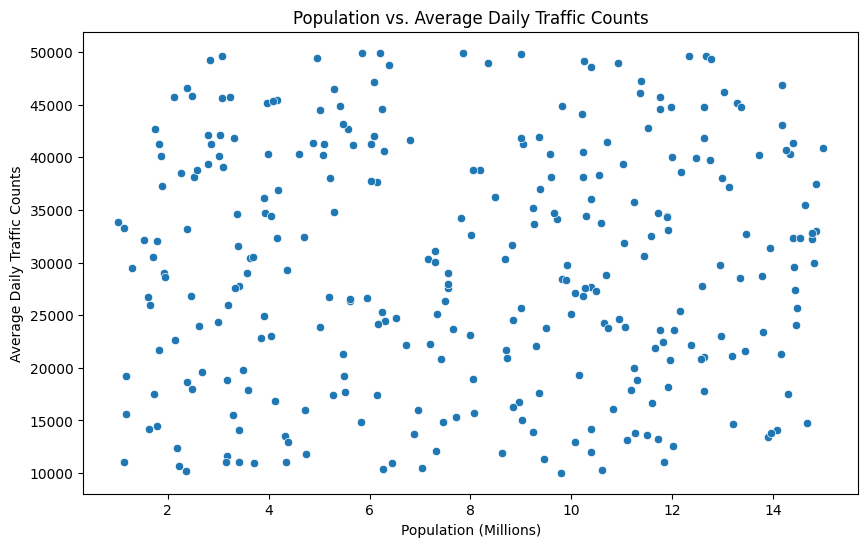

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Million', y='Average_Daily_Traffic_Counts', data=data_df)
plt.xlabel('Population (Millions)')
plt.ylabel('Average Daily Traffic Counts')
plt.title('Population vs. Average Daily Traffic Counts')
plt.show()



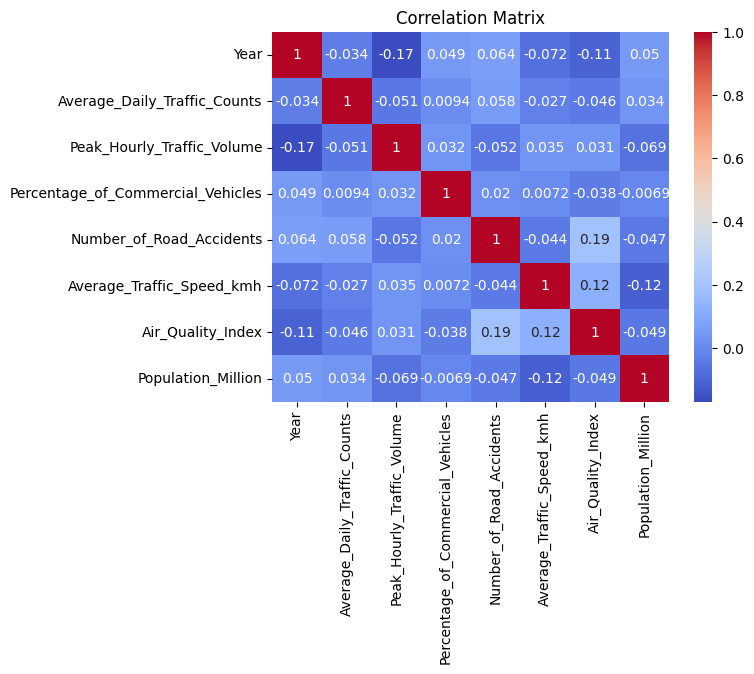

In [ ]:
correlation_matrix = data_df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Classification Model from Scratch

In [ ]:
# Define traffic categories based on percentiles
percentiles = np.percentile(data_df['Average_Daily_Traffic_Counts'], [33, 66])
def categorize_traffic(count):
    if count <= percentiles[0]:
        return 0  # Low
    elif count <= percentiles[1]:
        return 1  # Medium
    else:
        return 2  # High

data_df['Traffic_Category'] = data_df['Average_Daily_Traffic_Counts'].apply(categorize_traffic)

# Encode categorical variables
data_df['City'] = data_df['City'].astype('category').cat.codes

# Normalizing numerical features
features = ['City', 'Year', 'Peak_Hourly_Traffic_Volume', 'Percentage_of_Commercial_Vehicles',
            'Number_of_Road_Accidents', 'Average_Traffic_Speed_kmh', 'Air_Quality_Index', 'Population_Million']
data_df[features] = (data_df[features] - data_df[features].min()) / (data_df[features].max() - data_df[features].min())

# Splitting into training and testing sets (80-20 split)
train_size = int(0.8 * len(data_df))
train_data = data_df[:train_size]
test_data = data_df[train_size:]

# Logistic Regression (Softmax) Implementation
class LogisticRegressionSoftmax:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        self.classes = np.unique(y)
        self.weights = np.random.rand(X.shape[1], len(self.classes))

        y_one_hot = np.eye(len(self.classes))[y]

        for _ in range(self.epochs):
            scores = np.dot(X, self.weights)
            probs = self.softmax(scores)
            gradient = np.dot(X.T, (probs - y_one_hot)) / X.shape[0]
            self.weights -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        scores = np.dot(X, self.weights)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)

# Training the model
X_train, y_train = train_data[features].values, train_data['Traffic_Category'].values
X_test, y_test = test_data[features].values, test_data['Traffic_Category'].values

model = LogisticRegressionSoftmax(lr=0.1, epochs=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 30.00%


### LogisticRegression from sklearn

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = np.mean(y_pred_lr == y_test)
print(f'Accuracy: {accuracy_lr * 100:.2f}%')


Accuracy: 31.67%


### DecisionTree from sklearn

In [ ]:
model_dc = DecisionTreeClassifier()
model_dc.fit(X_train, y_train)
y_pred_dc = model_dc.predict(X_test)
accuracy_dc = np.mean(y_pred_dc == y_test)
print(f'Accuracy: {accuracy_dc * 100:.2f}%')

Accuracy: 28.33%


### HyperParameter tuning for logistic regression and decision tree

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Logistic Regression Hyperparameter Grid
logistic_params = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Type of regularization
    "solver": ["liblinear", "saga"]  # Solvers supporting L1 and L2 penalties
}

# Decision Tree Classifier Hyperparameter Grid
tree_params = {
    "criterion": ["gini", "entropy"],  # Splitting criteria
    "max_depth": [3, 5, 10, None],  # Limits tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]  # Minimum samples in a leaf node
}

# Grid Search for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), logistic_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Grid Search for Decision Tree Classifier
grid_dc = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dc.fit(X_train, y_train)
best_dc = grid_dc.best_estimator_
y_pred_dc = best_dc.predict(X_test)
accuracy_dc = accuracy_score(y_test, y_pred_dc)

# Print Best Parameters and Accuracy
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

print("\nBest Decision Tree Parameters:", grid_dc.best_params_)
print(f'Decision Tree Accuracy: {accuracy_dc * 100:.2f}%')
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dc))


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Accuracy: 31.67%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        24
           2       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.11      0.33      0.16        60
weighted avg       0.10      0.32      0.15        60


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 30.00%

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.24      0.47      0.32        17
           1       0.38      0.12      0.19        24
           2       0.37      0.37      0.37        19

    accuracy                           0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Linear Regression from Scratch

In [ ]:
data_df['City'] = data_df['City'].astype('category').cat.codes

# Normalizing numerical features
features = ['City', 'Year', 'Peak_Hourly_Traffic_Volume', 'Percentage_of_Commercial_Vehicles',
            'Number_of_Road_Accidents', 'Average_Traffic_Speed_kmh', 'Population_Million']
data_df[features] = (data_df[features] - data_df[features].min()) / (data_df[features].max() - data_df[features].min())

# Splitting into training and testing sets (80-20 split)
train_size = int(0.8 * len(data_df))
train_data = data_df[:train_size]
test_data = data_df[train_size:]

# Linear Regression Implementation for Air Quality Index
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        self.weights = np.random.rand(X.shape[1])

        for _ in range(self.epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            gradient = np.dot(X.T, errors) / X.shape[0]
            self.weights -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return np.dot(X, self.weights)

# Preparing data for Air Quality Index prediction
X_train_air, y_train_air = train_data[features].values, train_data['Air_Quality_Index'].values
X_test_air, y_test_air = test_data[features].values, test_data['Air_Quality_Index'].values

# Training the linear regression model
lr_model = LinearRegression(lr=0.01, epochs=5000)
lr_model.fit(X_train_air, y_train_air)
y_pred_air = lr_model.predict(X_test_air)

# Calculating Mean Squared Error
mse = np.mean((y_pred_air - y_test_air) ** 2)
print(f'Mean Squared Error for Air Quality Index Prediction: {mse:.2f}')


Mean Squared Error for Air Quality Index Prediction: 0.07


### Linear Regression from sklearn

In [ ]:
 # Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_air, y_train_air)
y_pred_linear = linear_reg.predict(X_test_air)

# Evaluate models
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test_air, y_pred_linear))
print("R-squared:", r2_score(y_test_air, y_pred_linear))


Linear Regression:
Mean Squared Error: 0.13866740509200853
R-squared: -1.1028802477304973


In [ ]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_air, y_train_air)
y_pred_tree = tree_reg.predict(X_test_air)

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test_air, y_pred_tree))
print("R-squared:", r2_score(y_test_air, y_pred_tree))


Decision Tree Regressor:
Mean Squared Error: 0.1471499506853042
R-squared: -1.2315173817907996


### HyperParameter tuning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Define parameter grid for Linear Regression (although it has limited tunable parameters)
linear_params = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# Use GridSearchCV for Linear Regression
linear_reg = GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='neg_mean_squared_error')
linear_reg.fit(X_train_air, y_train_air)
y_pred_linear = linear_reg.best_estimator_.predict(X_test_air)

# Evaluate Linear Regression
print("Best Linear Regression Params:", linear_reg.best_params_)
print("\nLinear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test_air, y_pred_linear))
print("R-squared:", r2_score(y_test_air, y_pred_linear))


# Define parameter grid for Decision Tree Regressor
tree_params = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Use GridSearchCV for Decision Tree Regressor
tree_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring='neg_mean_squared_error')
tree_reg.fit(X_train_air, y_train_air)
y_pred_tree = tree_reg.best_estimator_.predict(X_test_air)

# Evaluate Decision Tree Regressor
print("\nBest Decision Tree Params:", tree_reg.best_params_)
print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test_air, y_pred_tree))
print("R-squared:", r2_score(y_test_air, y_pred_tree))


Best Linear Regression Params: {'fit_intercept': True, 'positive': True}

Linear Regression:
Mean Squared Error: 0.07031570825100743
R-squared: -0.06633216283316345

Best Decision Tree Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Decision Tree Regressor:
Mean Squared Error: 0.07951306440375298
R-squared: -0.20580934257932038
